In [237]:
import sklearn # import Scikit-Learn library
from sklearn.metrics import mean_absolute_error # import mean absolute error
import pandas as pd # import pandas library
import matplotlib.pyplot as plt # import MatPlotLib library
import numpy as np # import NumPy

In [238]:
money = pd.read_csv("usd_rate_2018-2019.csv", delimiter = ",")
# read the dataset; the start date 

In [239]:
past = 7 * 4 # take the past 4 weeks 
future = 7 # we will predict the future values on 7 days ahead

In [240]:
values = money["curs"]

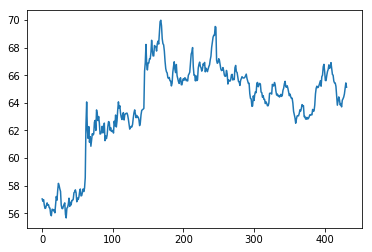

In [241]:
plt.plot(values)

In [242]:
start = past # counting from 28th day
end = len(values) - future # end 7 days before end

prepared = []

"""The following for loops taking the past(28 days) 
and the future values(7 days) to create a table of combined values named "prepared"
E.g.: We used a 29th value (56.3438) in the given dataset "values", took a value which was 28 days before and 7 days 
after and written to the table (not a vector\vertical). Hence we have 397 rows x 35 columns table. """

for i in range (start, end):
    past_and_future_value = values[(i - past): (i + future)] 
    # take the values from the past and the future
    prepared.append(list(past_and_future_value)) 
    # append the values from "past_and_future_value" to the variable "prepared"

In [243]:
past_columns = [f"past_{i}" for i in range(past)] 
# taking all the values from from 0 to the variable "past" (28th days)
# using list comprehension method to create a name to a list of values (28th days = value start)
future_columns = [f"future_{i}" for i in range(future)]
# the same approach as was used for "past_columns" list comprehension

In [244]:
data_frame = pd.DataFrame(prepared, columns=(past_columns+future_columns)) 
# create a data frame(table) using Pandas

## Using Linear Regerssion Model
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [245]:
from sklearn.linear_model import LinearRegression

In [246]:
LinReg = LinearRegression() # initializig Linear Regression

In [247]:
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [248]:
# training dataset
X = data_frame[past_columns][:-1] # the dataset consists of all the values except the last day
y = data_frame[future_columns][:-1]

In [249]:
# test dataset 
X_test = data_frame[past_columns][-1:] # the dataset consists of all the value of the last day
y_test = data_frame[future_columns][-1:]

In [250]:
LinReg.fit(X,y) # applying Linear Regression to the test dataset

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [251]:
prediction = LinReg.predict(X_test) # calling a prediction using Linear Regression model to Rubble

In [252]:
prediction # predicted values of $ Exchange Rate to Rubble 

array([[64.16412047, 64.25996538, 64.25148978, 64.15781021, 64.17147762,
        64.27480852, 64.41572127]])

In [253]:
y_test # actual values of $ Exchange Rates

,future_0,future_1,future_2,future_3,future_4,future_5,future_6
396,63.706,64.1873,64.2888,64.4156,64.6407,65.067,65.4399


In [254]:
print("NP.Linalg.Norm:", np.linalg.norm(y_test - prediction)) # calling a vector normalisation 

NP.Linalg.Norm: 1.4763743816775192


In [255]:
print("Mean Absolute Error:", mean_absolute_error(y_test, prediction)) # calling a mean absolute error in Rubble

Mean Absolute Error: 0.4444969217982536


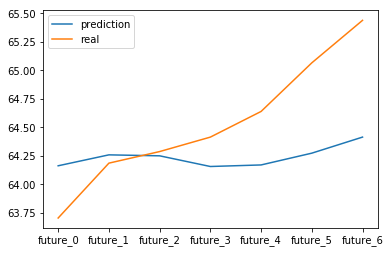

In [256]:
"""Creating a function which will take the values from the dataset"""

plt.plot(prediction[0], label = "prediction") 
# prediction = "0", because the list (data massive) consisting from one element
plt.plot(y_test.iloc[0], label = "real")
# y_test is using a dateframe through "iloc" method
plt.legend()

In [257]:
values[-28:] # values for the last 28 days

404    66.2608
405    66.4127
406    66.7471
407    66.4897
408    66.6235
409    66.9072
410    66.5002
411    66.0528
412    65.9981
413    65.5698
414    65.4393
415    65.4321
416    65.1909
417    64.4711
418    63.8272
419    64.1213
420    64.4290
421    64.2199
422    63.8487
423    63.9453
424    63.7060
425    64.1873
426    64.2888
427    64.4156
428    64.6407
429    65.0670
430    65.4399
431    65.1312
Name: curs, dtype: float64

In [258]:
LinReg.predict([values[-28:]]) # prediction for a week ahead (7days)

array([[64.90333765, 64.78479675, 64.74828077, 64.71906045, 64.72973192,
        64.82666761, 64.79862495]])

## Using MLP Regressor Neural Network (Multi-layer Perceptron regressor).
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [259]:
""" Using MLP Regressor (Multi-layer Perceptron regressor) from Sckit-learn to make prediction"""
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(random_state=42, max_iter = 2000, hidden_layer_sizes=(90,130), 
                  alpha=0.0001, solver = "lbfgs")

In [260]:
MLP.fit(X,y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(90, 130), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [261]:
prediction = MLP.predict(X_test) # prediction using Neural Network 

In [262]:
print("Results using  MLPRegressor Model")
print("NP.Linalg.Norm:", np.linalg.norm(y_test - prediction))
print("Mean Absolute Error:", mean_absolute_error(y_test, prediction))

Results using  MLPRegressor Model
NP.Linalg.Norm: 1.181944589377921
Mean Absolute Error: 0.3237745027666473


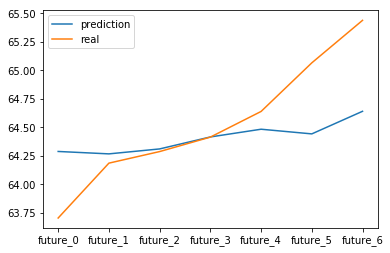

In [263]:
"""Creating a function which will take the values from the dataset"""

plt.plot(prediction[0], label = "prediction") 
# prediction = "0", because the list (data massive) consisting from one element
plt.plot(y_test.iloc[0], label = "real")
# y_test is using a dateframe through "iloc" method
plt.legend()

## Using Lasso Linear Model
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [264]:
from sklearn.linear_model import Lasso

In [265]:
# training dataset
X = data_frame[past_columns][:-1]
y = data_frame[future_columns][:-1]

In [266]:
# test dataset 
X_test = data_frame[past_columns][-1:]
y_test = data_frame[future_columns][-1:]

In [267]:
model = Lasso(random_state=42, max_iter = 5000)

In [268]:
model.fit(X,y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)

In [269]:
prediction = model.predict(X_test) # calling a prediction using Lasso model to Rubble

In [270]:
print("Results using Lasso Model")
print("NP.Linalg.Norm:", np.linalg.norm(y_test - prediction))
print("Mean Absolute Error:", mean_absolute_error(y_test, prediction))

Results using Lasso Model
NP.Linalg.Norm: 1.51350330567727
Mean Absolute Error: 0.4566764587572152


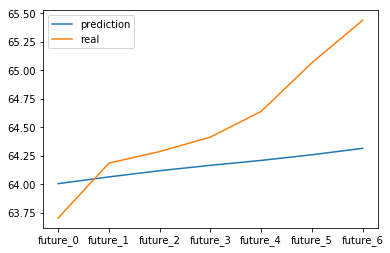

In [271]:
"""Creating a function which will take the values from the dataset"""

plt.plot(prediction[0], label = "prediction") 
# prediction = "0", because the list (data massive) consisting from one element
plt.plot(y_test.iloc[0], label = "real")
# y_test is using a dateframe through "iloc" method
plt.legend()

## Using KNeighborsRegressor
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [272]:
from sklearn.neighbors import KNeighborsRegressor

In [273]:
# training dataset
X = data_frame[past_columns][:-1]
y = data_frame[future_columns][:-1]

In [274]:
# test dataset 
X_test = data_frame[past_columns][-1:]
y_test = data_frame[future_columns][-1:]

In [275]:
KNReg = KNeighborsRegressor(leaf_size=40, n_neighbors=7, weights='distance')

In [276]:
KNReg.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=40, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=7, p=2,
          weights='distance')

In [277]:
prediction = KNReg.predict(X_test) # calling a prediction using KNeighborsRegressor model to Rubble

In [278]:
print("Results using KNeighborsRegressor Model")
print("NP.Linalg.Norm:", np.linalg.norm(y_test - prediction))
print("Mean Absolute Error:", mean_absolute_error(y_test, prediction))

Results using KNeighborsRegressor Model
NP.Linalg.Norm: 0.9804035083241216
Mean Absolute Error: 0.3259755384233947


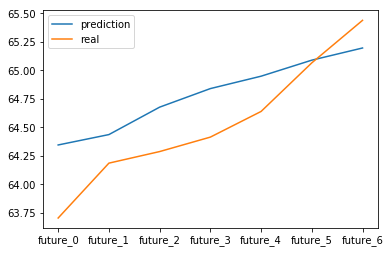

In [279]:
"""Creating a function which will take the values from the dataset"""

plt.plot(prediction[0], label = "prediction") 
# prediction = "0", because the list (data massive) consisting from one element
plt.plot(y_test.iloc[0], label = "real")
# y_test is using a dateframe through "iloc" method
plt.legend()

## MultiTaskElasticNet Model
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.MultiTaskElasticNet.html#sklearn.linear_model.MultiTaskElasticNet

In [280]:
from sklearn.linear_model import MultiTaskElasticNet

In [281]:
# training dataset
X = data_frame[past_columns][:-1]
y = data_frame[future_columns][:-1]

In [282]:
# test dataset 
X_test = data_frame[past_columns][-1:]
y_test = data_frame[future_columns][-1:]

In [283]:
MTEN = MultiTaskElasticNet(random_state = 42, max_iter=2500, selection='random', tol=0.0003, l1_ratio=0.2)

In [284]:
MTEN.fit(X,y)

MultiTaskElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.2,
          max_iter=2500, normalize=False, random_state=42,
          selection='random', tol=0.0003, warm_start=False)

In [285]:
prediction = MTEN.predict(X_test) # calling a prediction using MultiTaskElasticNet model to Rubble

In [286]:
print("Results using MultiTaskElasticNet Model")
print("NP.Linalg.Norm:", np.linalg.norm(y_test - prediction))
print("Mean Absolute Error:", mean_absolute_error(y_test, prediction))

Results using MultiTaskElasticNet Model
NP.Linalg.Norm: 1.3500289158556211
Mean Absolute Error: 0.3738436715934869


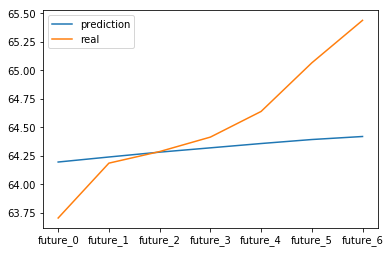

In [287]:
"""Creating a function which will take the values from the dataset"""

plt.plot(prediction[0], label = "prediction") 
# prediction = "0", because the list (data massive) consisting from one element
plt.plot(y_test.iloc[0], label = "real")
# y_test is using a dateframe through "iloc" method
plt.legend()

## ElasticNet Model
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet

In [288]:
from sklearn.linear_model import ElasticNet

In [289]:
# training dataset
X = data_frame[past_columns][:-1]
y = data_frame[future_columns][:-1]

In [290]:
# test dataset 
X_test = data_frame[past_columns][-1:]
y_test = data_frame[future_columns][-1:]

In [306]:
EN = ElasticNet(random_state = 42, max_iter=3000, l1_ratio=0.2, selection="cyclic")

In [308]:
EN.fit(X,y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.2,
      max_iter=3000, normalize=False, positive=False, precompute=False,
      random_state=42, selection='cyclic', tol=0.0001, warm_start=False)

In [304]:
prediction = EN.predict(X_test) # calling a prediction using ElasticNet model to Rubble

In [309]:
print("Results using ElasticNet Model")
print("NP.Linalg.Norm:", np.linalg.norm(y_test - prediction))
print("Mean Absolute Error:", mean_absolute_error(y_test, prediction))

Results using ElasticNet Model
NP.Linalg.Norm: 1.3451817859289237
Mean Absolute Error: 0.37836060614702866


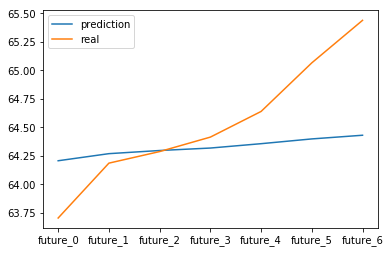

In [295]:
"""Creating a function which will take the values from the dataset"""

plt.plot(prediction[0], label = "prediction") 
# prediction = "0", because the list (data massive) consisting from one element
plt.plot(y_test.iloc[0], label = "real")
# y_test is using a dateframe through "iloc" method
plt.legend()

## Ensemble BaggingRegressor Model
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor

In [343]:
from sklearn.ensemble import BaggingRegressor

In [344]:
# training dataset
X = data_frame[past_columns][:-1]
y = data_frame[future_columns][:-1]

In [345]:
# test dataset 
X_test = data_frame[past_columns][-1:]
y_test = data_frame[future_columns][-1:]

In [406]:
BG = BaggingRegressor(random_state=42)

In [407]:
BG.fit(X,y)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=42,
         verbose=0, warm_start=False)

In [408]:
prediction = BG.predict(X_test) # calling a prediction using Ensemble Bagging Regressor Model to Rubble

In [409]:
print("Results using Bagging Regressor Model")
print("NP.Linalg.Norm:", np.linalg.norm(y_test - prediction))
print("Mean Absolute Error:", mean_absolute_error(y_test, prediction))

Results using Bagging Regressor Model
NP.Linalg.Norm: 0.9035717651631096
Mean Absolute Error: 0.2268457142857098


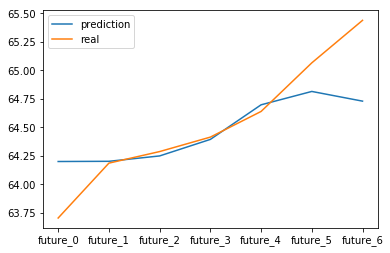

In [352]:
"""Creating a function which will take the values from the dataset"""

plt.plot(prediction[0], label = "prediction") 
# prediction = "0", because the list (data massive) consisting from one element
plt.plot(y_test.iloc[0], label = "real")
# y_test is using a dateframe through "iloc" method
plt.legend()

## Overall Model Results
#### 1. Results using Bagging Regressor Model
NP.Linalg.Norm: 0.9035717651631096 -> the best one
<br>
Mean Absolute Error: 0.2268457142857098 -> the best one

#### 2. Results using KNeighborsRegressor Model
NP.Linalg.Norm: 0.9804035083241216
<br>
Mean Absolute Error: 0.3259755384233947

#### 3. Results for a MLP Regressor Neural Network:
NP.Linalg.Norm: 1.181944589377921
<br>
Mean Absolute Error: 0.3237745027666473

#### 4. Results using MultiTaskElasticNet Model
NP.Linalg.Norm: 1.3500289158556211
<br>
Mean Absolute Error: 0.3738436715934869

#### 5. Results using ElasticNet Model
NP.Linalg.Norm: 1.3451817859289237
<br>
Mean Absolute Error: 0.37836060614702866

#### 6. Results for a Linear Regression Model:
NP.Linalg.Norm: 1.4763743816775192
<br>
Mean Absolute Error: 0.4444969217982536

#### 7. Results using Lasso Model
NP.Linalg.Norm: 1.51350330567727
<br>
Mean Absolute Error: 0.4566764587572152

### Summary \ Observation
The model **Bagging Regressor Model** has shown the best result. I assume because the model fits base regressors each on random subsets of the original dataset and then aggregate their individual predictions to form a final prediction (the explanation is taken from the official Sckit-Learn documentation). The results have been acquired by using a default hyperparameters of the model (except for "random_state" parameter which is similar for every model in this job).
<br>
Also, this model has used The Decision Tree approach (estimator) has proven useful for another model - **KNeighborsRegressor** which has the second-best result. The parameters *"leaf_size"* and *"n_neighbors"* have influenced model performance.
<br>
The third result has been taken by the **MLP Regressor Neural Network**. I assume, if I had uploaded larger dataset the results could be better. Additionally, hyper-parameters such as *"max_iter"* and *"hidden_layer_sizes"* have influenced much on the model performance.
<br>
The fourth and fifth results are represented by the **ElasticNet and the MultTaskElasticNet** models which have shown somewhat similar results. I noticed that changing hyperparameters *"l1_ratio"* and *"selection"* affects performance.
<br>
The sixth result is represented by **Linear Regression Model**. I noticed that changing *"n_jobs"* affects the model performance.
<br>
The seventh and the worst result have shown by **Lasso model**. I noticed that tunning *"max_iter"* parameter affects the model behaviuor.